In [3]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#import matplotlib.pyplot as plt
#nltk.downloader.download('vader_lexicon')

In [4]:
# Autentikasi
consumerKey = "yo3xDeJbAxM5TTWSryUFalDR2"
consumerSecret = "5cOcpYDmuIFAxSuntuyVCnpxTETAyU0Dpyggx9lcQbuSCb5AAE"
accessToken = "1400338445982003203-1hcHkOFOTDMCa0UxTT3QVqa7zcKz0g"
accessTokenSecret = "jAwlCs3KqBNwgztBJBZ46aQ685WoujmaJSgGnfHpdVbP4"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [5]:
#Analisis Sentimen

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Masukkan kata kunci: ")
noOfTweet = int(input ("Berapa banyak tweet yang akan dianalisa: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
print('done')

Masukkan kata kunci: VaksinasiCovid19
Berapa banyak tweet yang akan dianalisa: 1500
done


In [6]:
#Jumlah Tweets (Total, Positif, Negatif, Netral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total keseluruhan: ",len(tweet_list))
print("jumlah positif: ",len(positive_list))
print("jumlah negatif: ", len(negative_list))
print("jumlah netral: ",len(neutral_list))

total keseluruhan:  1500
jumlah positif:  68
jumlah negatif:  31
jumlah netral:  1401


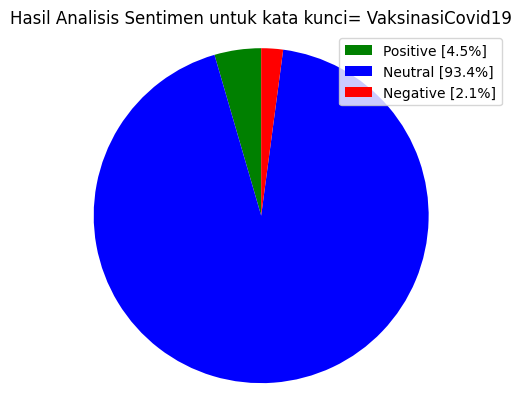

In [11]:
#membuat PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Hasil Analisis Sentimen untuk kata kunci= "+keyword+"" )
plt.axis('equal')
plt.show()

In [12]:
tweet_list.drop_duplicates(inplace = True)

In [13]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,‘Bersama kita membantu’\n\nPetugas di Pusat Va...,‘Bersama kita membantu’\n\nPetugas di Pusat Va...
1,RT @SinarOnline: Pakar kesihatan mencadangkan ...,RT @SinarOnline: Pakar kesihatan mencadangkan ...
2,Harusnya udah dilakukan sejak awal dimulainya ...,Harusnya udah dilakukan sejak awal dimulainya ...
3,RT @unisa_yogya: Bagian dari ikhtiar perang me...,RT @unisa_yogya: Bagian dari ikhtiar perang me...
4,"d-19 dan Duta Adaptasi Kebiasaan Baru, Reisa B...","d-19 dan Duta Adaptasi Kebiasaan Baru, Reisa B..."
...,...,...
1494,"Dibilang / disebut ""Kadrun"" ngomelnya sampai k...","Dibilang / disebut ""Kadrun"" ngomelnya sampai k..."
1495,"RT @ridwan0726: Mereka ""pembohong besar""👎\n\n#...","RT @ridwan0726: Mereka ""pembohong besar""👎\n\n#..."
1497,"Mereka ""pembohong besar""👎\n\n#SalamSehatSelalu...","Mereka ""pembohong besar""👎\n\n#SalamSehatSelalu..."
1498,@SIWE___ @EmillyLuwita46 @Poltergeist_id @Baha...,@SIWE___ @EmillyLuwita46 @Poltergeist_id @Baha...


In [14]:
tweet_list

,0,text
0,‘Bersama kita membantu’\n\nPetugas di Pusat Va...,‘Bersama kita membantu’\n\nPetugas di Pusat Va...
1,RT @SinarOnline: Pakar kesihatan mencadangkan ...,RT @SinarOnline: Pakar kesihatan mencadangkan ...
2,Harusnya udah dilakukan sejak awal dimulainya ...,Harusnya udah dilakukan sejak awal dimulainya ...
3,RT @unisa_yogya: Bagian dari ikhtiar perang me...,RT @unisa_yogya: Bagian dari ikhtiar perang me...
4,"d-19 dan Duta Adaptasi Kebiasaan Baru, Reisa B...","d-19 dan Duta Adaptasi Kebiasaan Baru, Reisa B..."
...,...,...
1494,"Dibilang / disebut ""Kadrun"" ngomelnya sampai k...","Dibilang / disebut ""Kadrun"" ngomelnya sampai k..."
1495,"RT @ridwan0726: Mereka ""pembohong besar""👎\n\n#...","RT @ridwan0726: Mereka ""pembohong besar""👎\n\n#..."
1497,"Mereka ""pembohong besar""👎\n\n#SalamSehatSelalu...","Mereka ""pembohong besar""👎\n\n#SalamSehatSelalu..."
1498,@SIWE___ @EmillyLuwita46 @Poltergeist_id @Baha...,@SIWE___ @EmillyLuwita46 @Poltergeist_id @Baha...


In [15]:
#Membersihkan Teks (RT, Tanda Baca, dll)

#Membuat kerangka data baru dan fitur baru
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Menghapus RT, Tanda Baca, dll
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,‘Bersama kita membantu’\n\nPetugas di Pusat Va...,bersama kita membantu petugas di pusat vaks...
1,RT @SinarOnline: Pakar kesihatan mencadangkan ...,pakar kesihatan mencadangkan supaya penerima ...
2,Harusnya udah dilakukan sejak awal dimulainya ...,harusnya udah dilakukan sejak awal dimulainya ...
3,RT @unisa_yogya: Bagian dari ikhtiar perang me...,bagian dari ikhtiar perang melawan covid 19 ...
4,"d-19 dan Duta Adaptasi Kebiasaan Baru, Reisa B...",d 19 dan duta adaptasi kebiasaan baru reisa b...
5,"Bupati Pesawaran, Dendi Romadhona, meminta war...",bupati pesawaran dendi romadhona meminta war...
6,"Warga Pulau Pahawang, Pesawaran terlihat antus...",warga pulau pahawang pesawaran terlihat antus...
7,Pengamanan vaksinasi di desa Lumbang kecamatan...,pengamanan vaksinasi di desa lumbang kecamatan...
8,Giat pelayanan PP dan ambulan dalam kegiatan S...,giat pelayanan pp dan ambulan dalam kegiatan s...
9,Day 2 after vaksin :\n\nIdk why but...\nAku me...,day 2 after vaksin idk why but aku meras...


In [16]:
#Menghitung nilai Negatif, Positif, Netral, dan Senyawa

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,‘Bersama kita membantu’\n\nPetugas di Pusat Va...,bersama kita membantu petugas di pusat vaks...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
1,RT @SinarOnline: Pakar kesihatan mencadangkan ...,pakar kesihatan mencadangkan supaya penerima ...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
2,Harusnya udah dilakukan sejak awal dimulainya ...,harusnya udah dilakukan sejak awal dimulainya ...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
3,RT @unisa_yogya: Bagian dari ikhtiar perang me...,bagian dari ikhtiar perang melawan covid 19 ...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
4,"d-19 dan Duta Adaptasi Kebiasaan Baru, Reisa B...",d 19 dan duta adaptasi kebiasaan baru reisa b...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
5,"Bupati Pesawaran, Dendi Romadhona, meminta war...",bupati pesawaran dendi romadhona meminta war...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
6,"Warga Pulau Pahawang, Pesawaran terlihat antus...",warga pulau pahawang pesawaran terlihat antus...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
7,Pengamanan vaksinasi di desa Lumbang kecamatan...,pengamanan vaksinasi di desa lumbang kecamatan...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
8,Giat pelayanan PP dan ambulan dalam kegiatan S...,giat pelayanan pp dan ambulan dalam kegiatan s...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
9,Day 2 after vaksin :\n\nIdk why but...\nAku me...,day 2 after vaksin idk why but aku meras...,0.8,0.7,positive,0.055,0.776,0.169,0.5423


In [17]:
#Membuat bingkai data baru untuk semua sentimen (positif, negatif, dan netral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [18]:
#Fungsi untuk count_values_in kolom tunggal

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [19]:
#Count_values untuk sentimen
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,1103,91.61
positive,66,5.48
negative,35,2.91


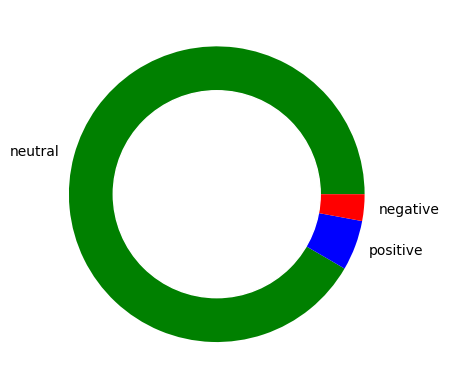

In [20]:
# buat data untuk Bagan Pai
import pc

pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Buat lingkaran untuk pusat plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
#plt.pie(size=[percentage],colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [21]:
#Fungsi untuk Membuat Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc_all.png")
    print("Word Cloud Saved Successfully")
    path="wc_all.png"
    display(Image.open(path))

Word Cloud Saved Successfully


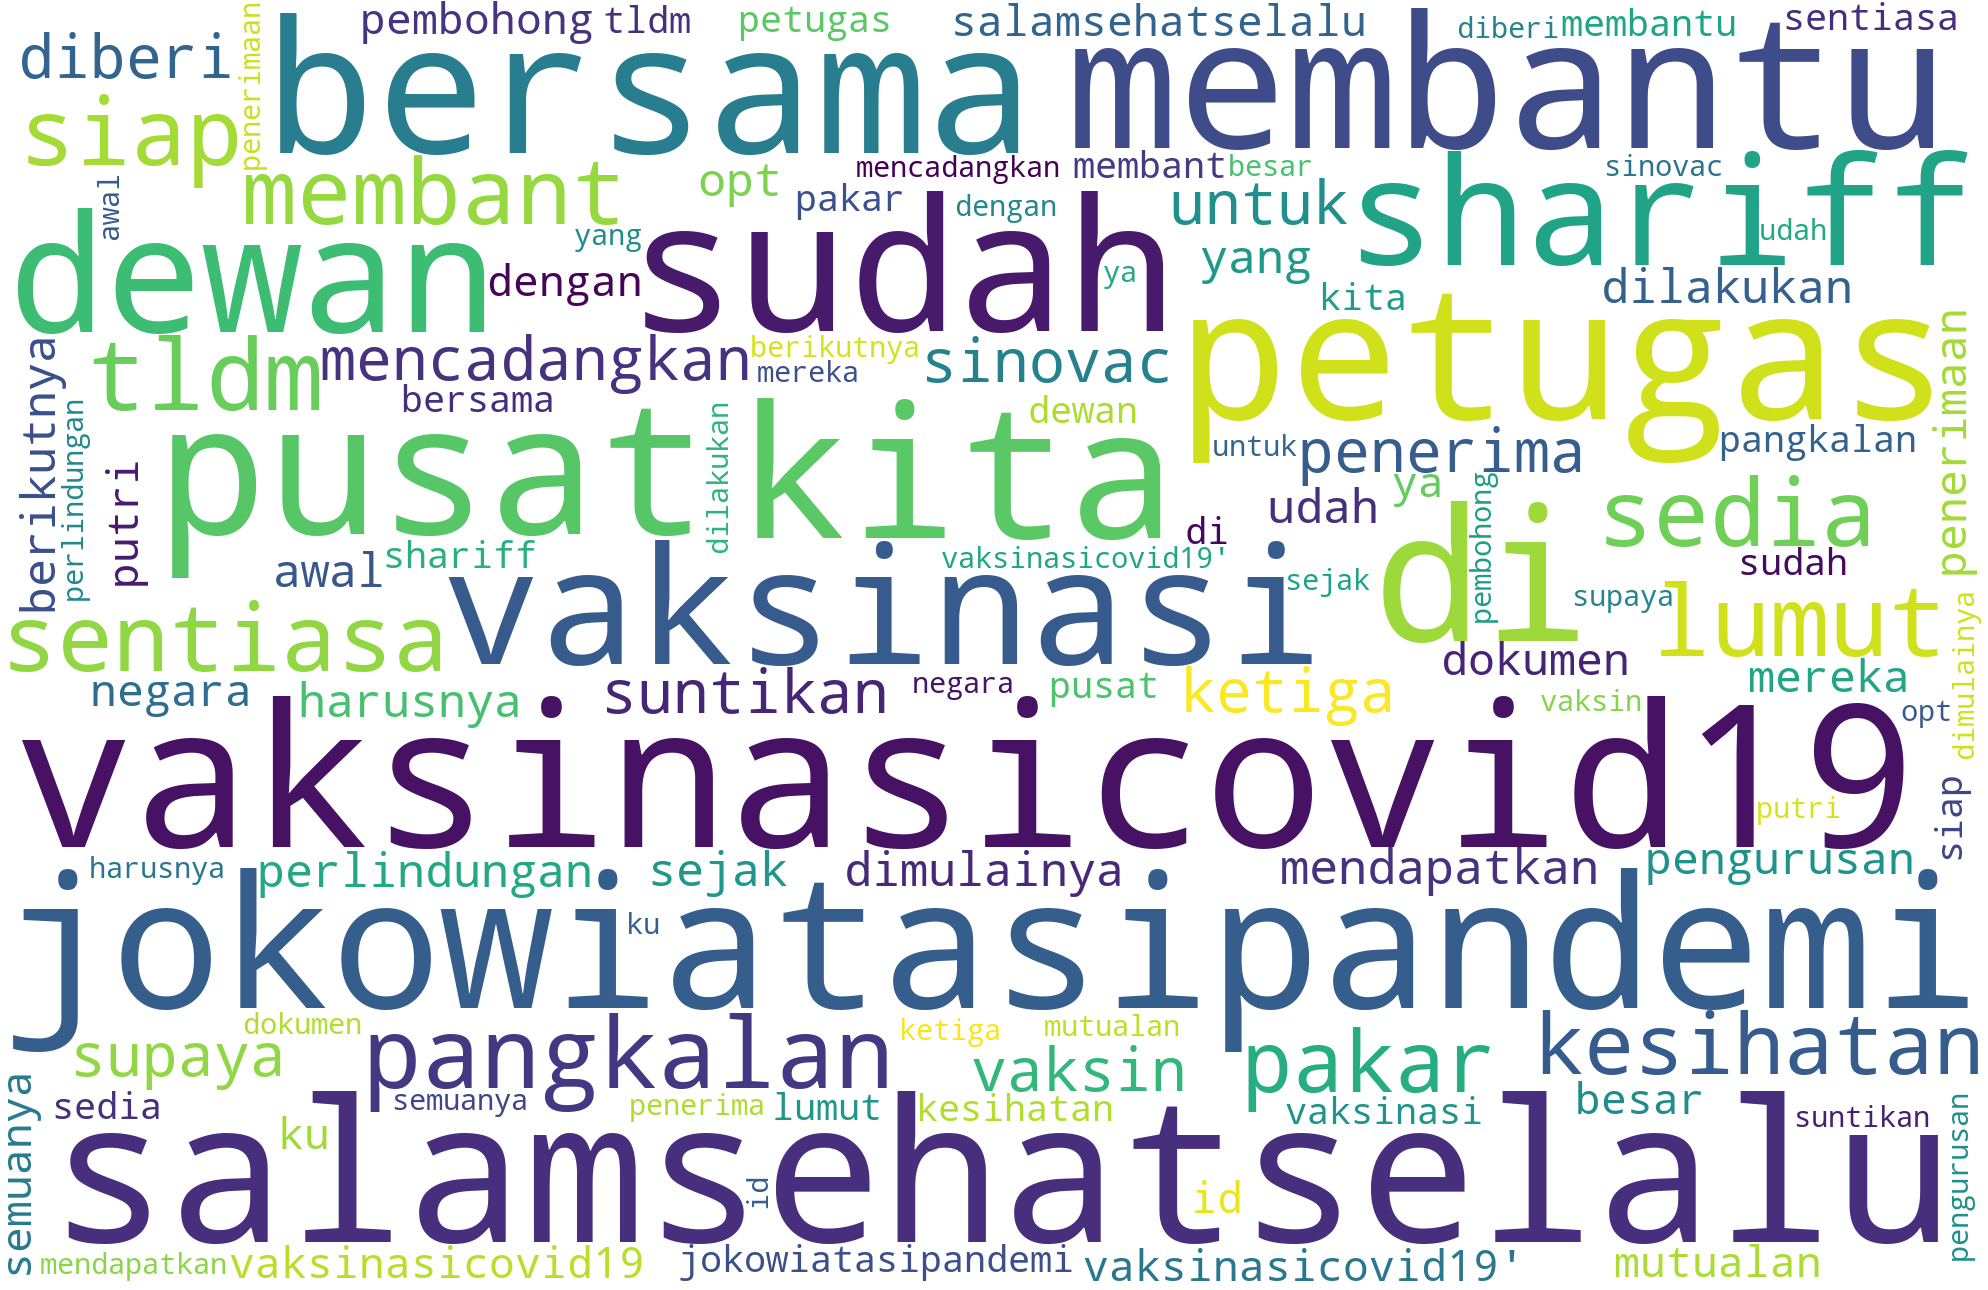

In [22]:
#Membuat wordcloud untuk semua tweets
create_wordcloud(tw_list["text"].values)

In [23]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="grey",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc_positive.png")
    print("Word Cloud Saved Successfully")
    path="wc_positive.png"
    display(Image.open(path))

Word Cloud Saved Successfully


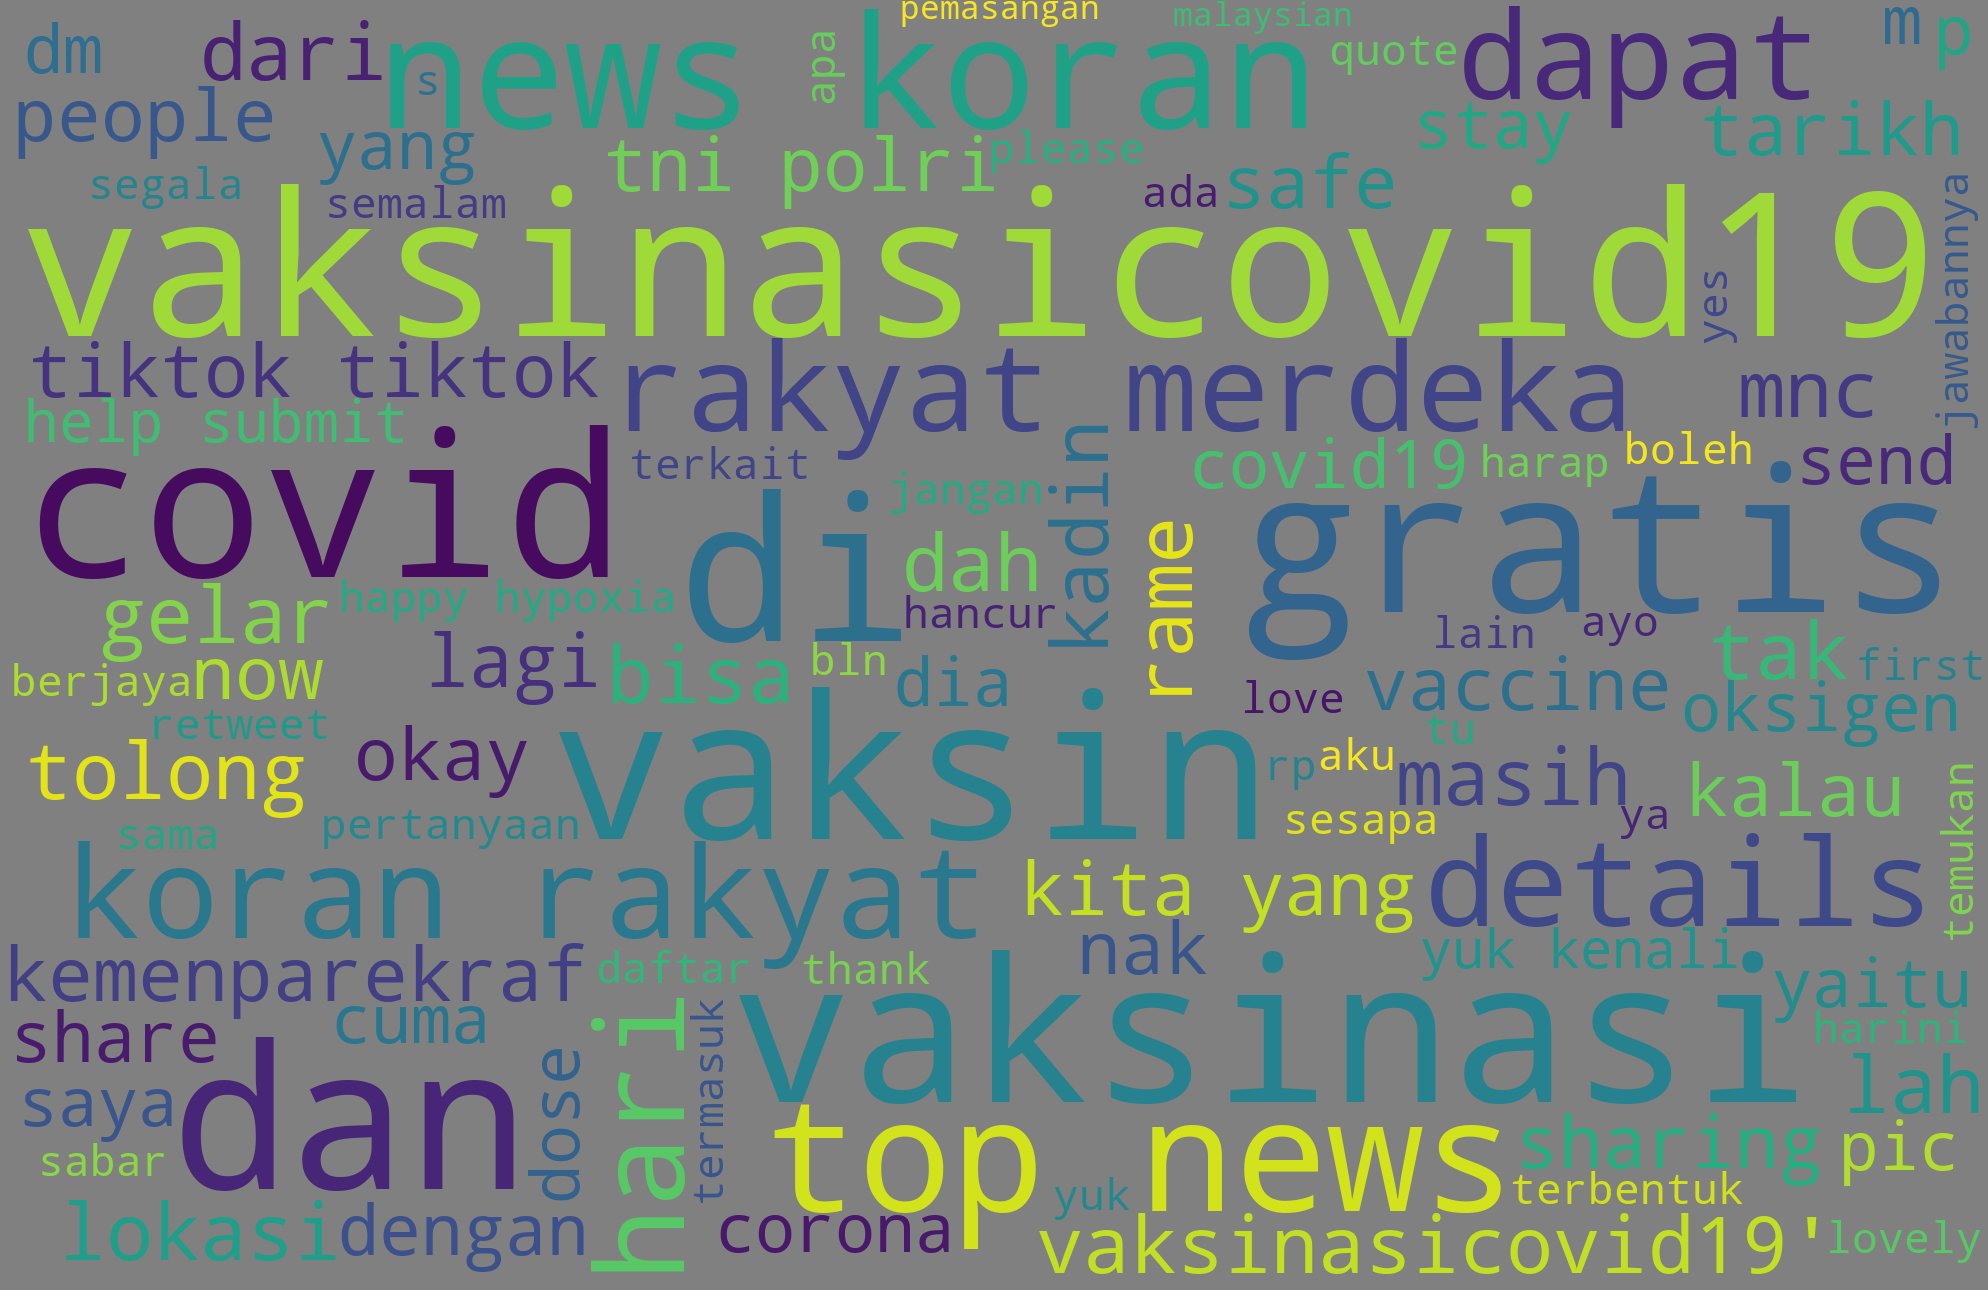

In [24]:
#Membuat wordcloud untuk sentimen positif
create_wordcloud(tw_list_positive["text"].values)

In [19]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="grey",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc_negative.png")
    print("Word Cloud Saved Successfully")
    path="wc_negative.png"
    display(Image.open(path))

Word Cloud Saved Successfully


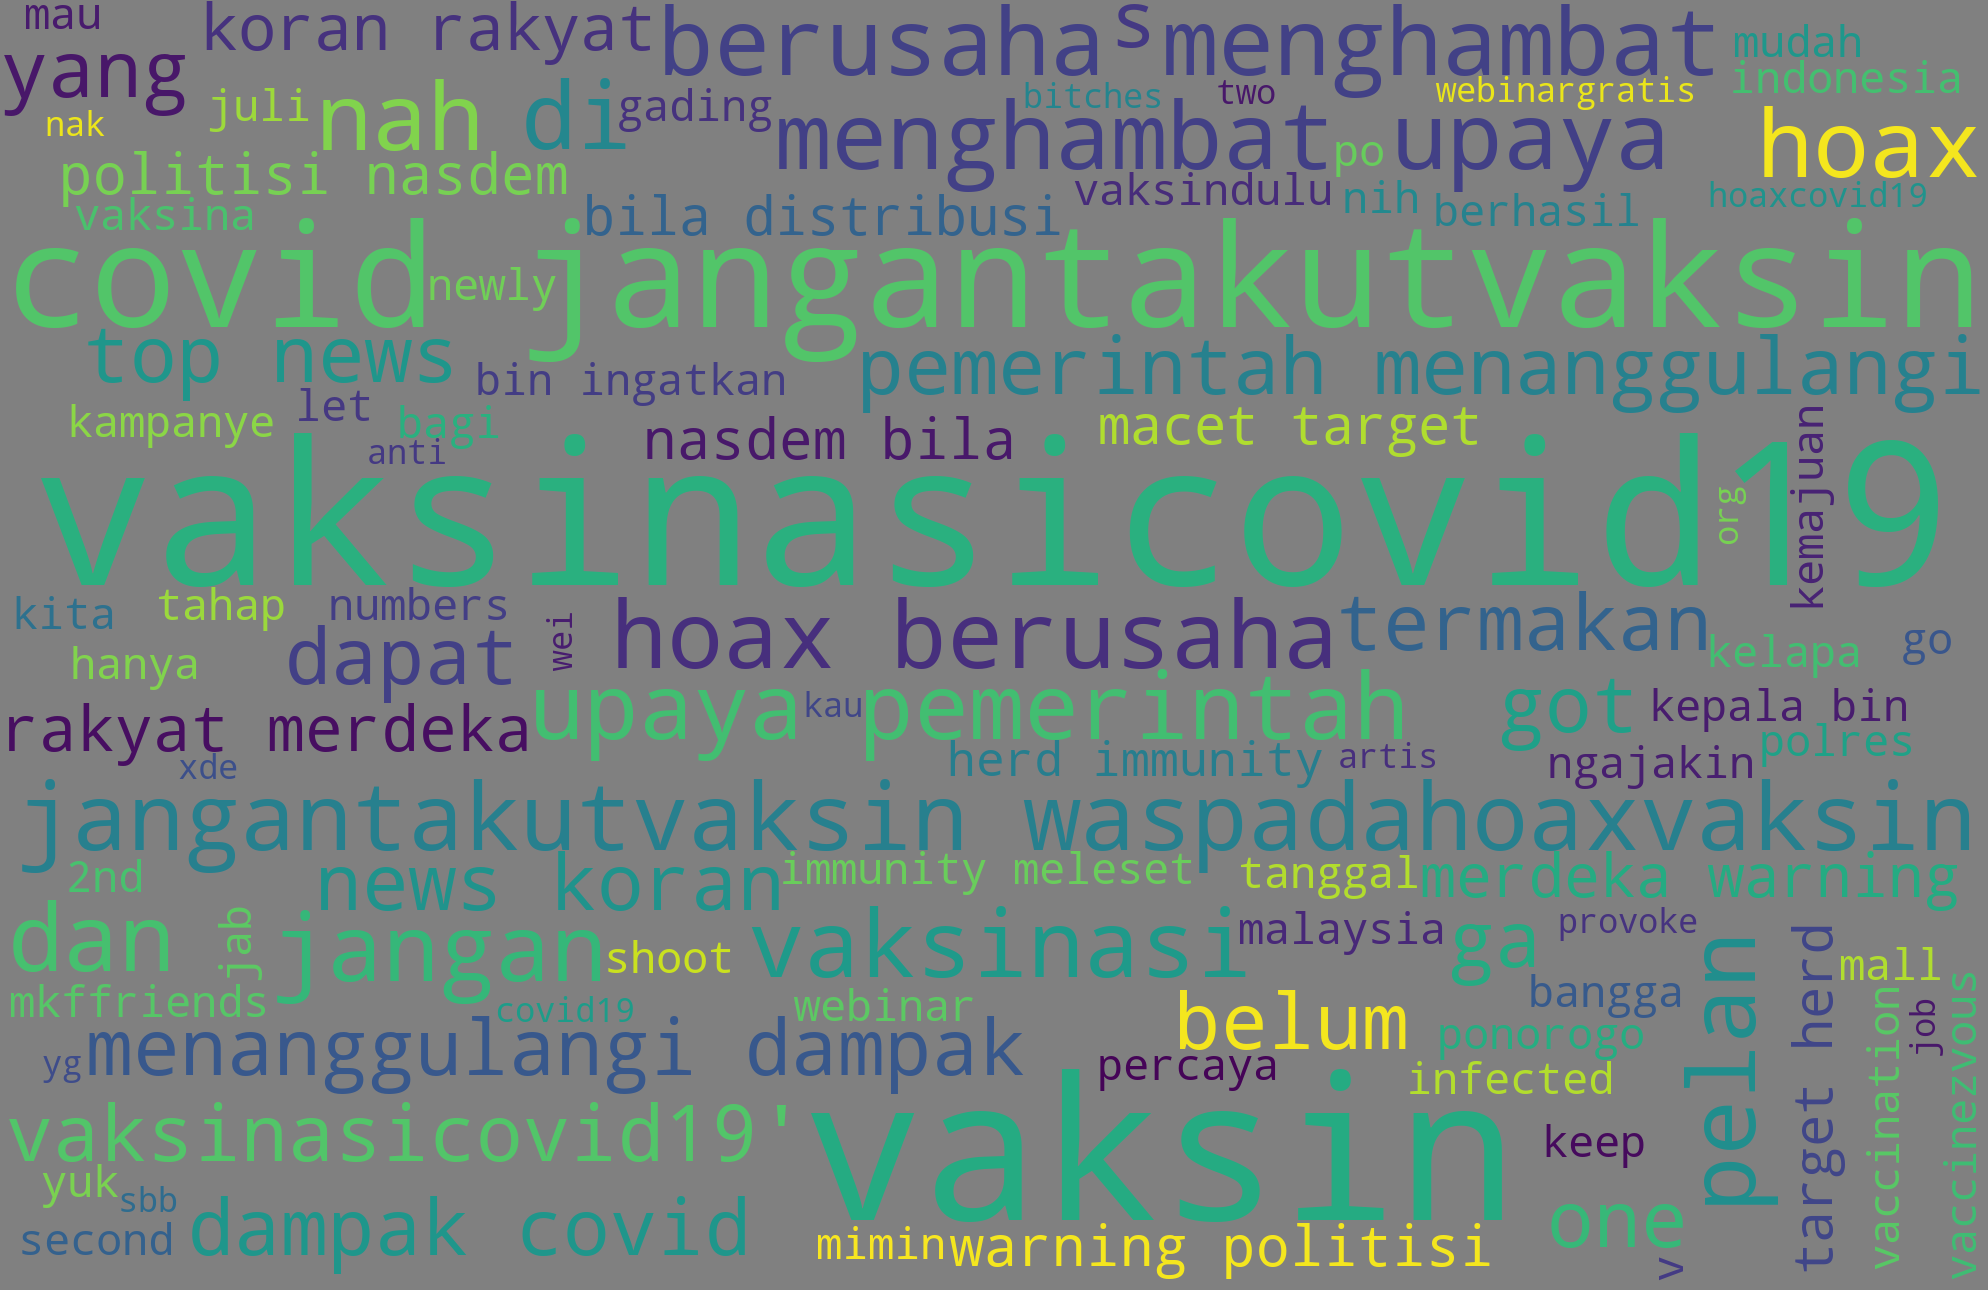

In [25]:
#Membuat wordcloud untuk sentimen negatif
create_wordcloud(tw_list_negative["text"].values)

In [26]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="grey",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc_neutral.png")
    print("Word Cloud Saved Successfully")
    path="wc_neutral.png"
    display(Image.open(path))

Word Cloud Saved Successfully


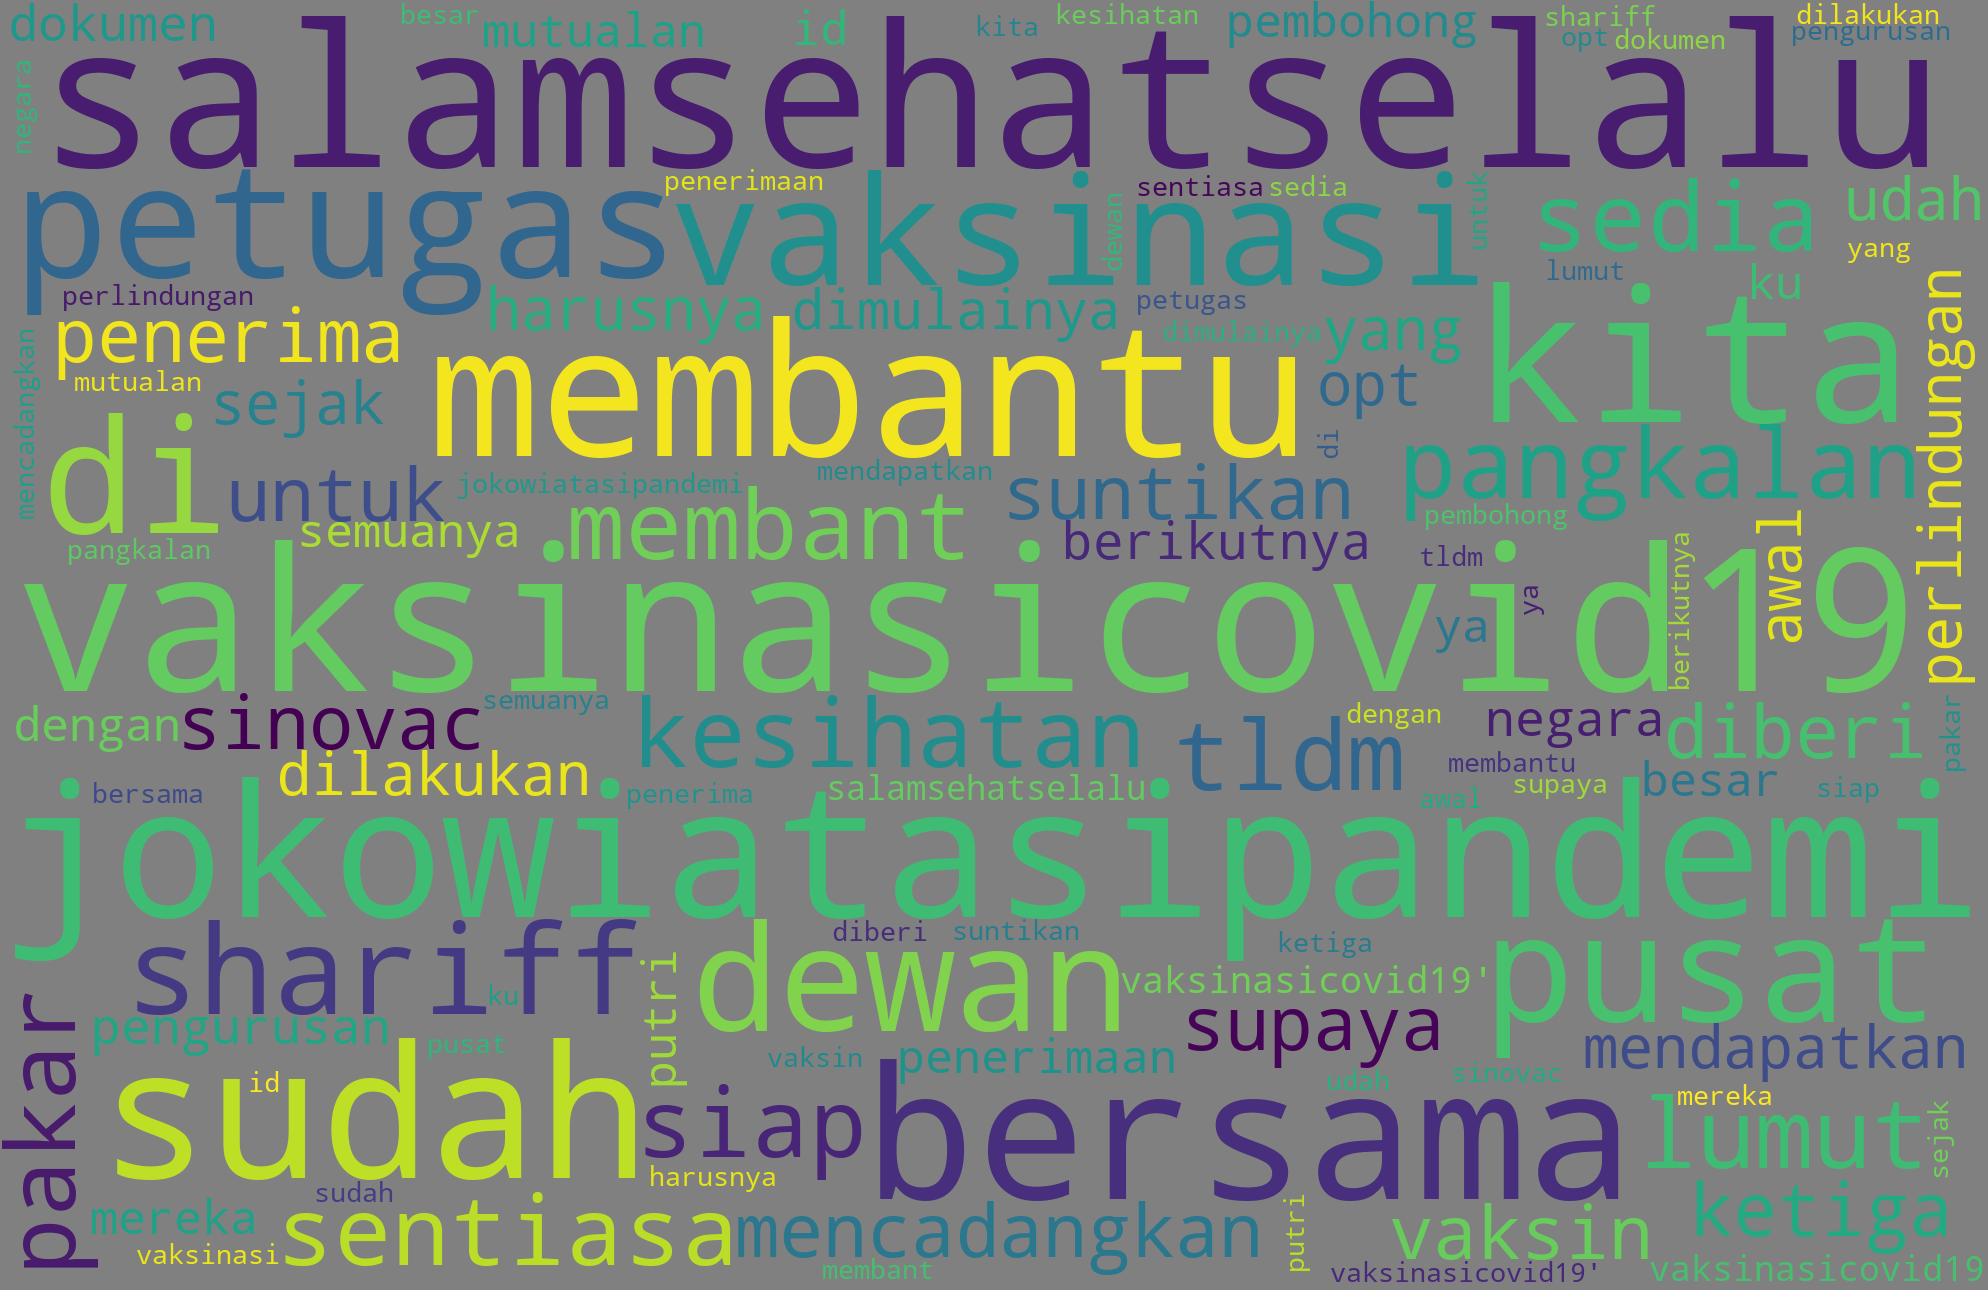

In [27]:
#Membuat wordcloud untuk sentimen netral
create_wordcloud(tw_list_neutral["text"].values)

In [28]:
#Menghitung panjang tweet dan jumlah kata
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [29]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,103.57
neutral,100.82
positive,106.00


In [30]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,14.29
neutral,12.83
positive,15.09


In [31]:
#Menghapus Tanda Baca
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [32]:
#Menerapkan tokenisasi
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [34]:
#Menghapus stopword
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [35]:
#Menerapkan Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [36]:
#Membersihkan Teks
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [37]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,‘Bersama kita membantu’\n\nPetugas di Pusat Va...,bersama kita membantu petugas di pusat vaks...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,118,16,bersama kita membantu petugas di pusat vaks...,"[, bersama, kita, membantu, petugas, di, pusat...","[, bersama, kita, membantu, petugas, di, pusat...","[, bersama, kita, membantu, petuga, di, pusat,..."
1,RT @SinarOnline: Pakar kesihatan mencadangkan ...,pakar kesihatan mencadangkan supaya penerima ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,124,15,pakar kesihatan mencadangkan supaya penerima ...,"[, pakar, kesihatan, mencadangkan, supaya, pen...","[, pakar, kesihatan, mencadangkan, supaya, pen...","[, pakar, kesihatan, mencadangkan, supaya, pen..."
2,Harusnya udah dilakukan sejak awal dimulainya ...,harusnya udah dilakukan sejak awal dimulainya ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,117,12,harusnya udah dilakukan sejak awal dimulainya ...,"[harusnya, udah, dilakukan, sejak, awal, dimul...","[harusnya, udah, dilakukan, sejak, awal, dimul...","[harusnya, udah, dilakukan, sejak, awal, dimul..."
3,RT @unisa_yogya: Bagian dari ikhtiar perang me...,bagian dari ikhtiar perang melawan covid 19 ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,119,17,bagian dari ikhtiar perang melawan covid un...,"[, bagian, dari, ikhtiar, perang, melawan, cov...","[, bagian, dari, ikhtiar, perang, melawan, cov...","[, bagian, dari, ikhtiar, perang, melawan, cov..."
4,"d-19 dan Duta Adaptasi Kebiasaan Baru, Reisa B...",d 19 dan duta adaptasi kebiasaan baru reisa b...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,118,19,d dan duta adaptasi kebiasaan baru reisa bro...,"[d, dan, duta, adaptasi, kebiasaan, baru, reis...","[dan, duta, adaptasi, kebiasaan, baru, reisa, ...","[dan, duta, adaptasi, kebiasaan, baru, reisa, ..."


In [38]:
#Menerapkan Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

1204 Number of reviews has 3226 words


In [39]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aa,aal,abah,aban,abang,abi,abubakar,abv,accent,...,yunani,yustisi,yuup,z,zahwani,zaki,zendaya,zeneca,zer,zonk
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Kata yang Paling sering Digunakan
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
vaksin,495
vaksinasicovid,493
vaksinasi,403
covid,296
di,269
yang,203
dan,180
untuk,133
xm,117
dengan,116


In [35]:
#Fungsi untuk ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [36]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),5)

n2_bigrams

[('covid 19', 211),
 ('vaksinasi covid', 78),
 ('vaksin vaksinasicovid19', 55),
 ('juli 2021', 53),
 ('gerai vaksin', 50)]

In [37]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),5)

n3_trigrams

[('vaksinasi covid 19', 73),
 ('gerai vaksin presisi', 48),
 ('covid 19 di', 36),
 ('vaksin covid 19', 32),
 ('hadiri gerai vaksin', 28)]